## Multivariate Linear Regression, Non-Parametric Models and Cross-Validation

**Name:** Mandeep Singh Brar        
**Student Id:** 8989367     
**Course Name:** Foundations of Machine Learning Frameworks     
**Course Code:** CSCN8010       

#### **Importing Libraries**

 - pandas - Work with data in a readable, tabular format (DataFrame)
 - scikit-learn	- Load the diabetes dataset for use in regression and ML tasks

In [17]:
# Import required libraries
import pandas as pd
from sklearn import datasets

## **Part 1**

###  **1. Get the Data**

In [18]:
# Load the diabetes dataset as a pandas DataFrame
diabetes = datasets.load_diabetes(as_frame=True)

# Full DataFrame with features and target
diabetes_data = diabetes.frame

# Separate features (X) and target (y)
X = diabetes.data
y = diabetes.target

# Preview the dataset
diabetes_data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


**Diabetes Dataset Overview**

- **Source**: Built-in dataset from Scikit-Learn.
- **Use Case**: Predicting the progression of diabetes one year after baseline.
- **Samples**: 442 patient records.
- **Features**: 10 continuous, standardized features:
  - `age`: Age of the patient  
  - `sex`: Sex of the patient  
  - `bmi`: Body Mass Index  
  - `bp`: Average blood pressure  
  - `s1` to `s6`: Various blood serum measurements  
- **Target**:  
  - A quantitative measure of disease progression (numeric value).
  - Column name: `target`

### **2. Frame the Problem**

**Objective:** Predict the diabetes progression in patients based on one year after baseline. 

**Problem Type**

- Type: Supervised Learning  
- Category: Regression  
- Target Variable: `target`
- Input Features: 10 continuous, standardized medical features

**Use Case:**       
A smart tool that helps doctors spot patients who are likely to see their diabetes worsen within a year—based on routine check-up data. This lets them step in early with the right care, improving outcomes and preventing complications.



### **3. EDA**

**Step 1: Describe the Data**

In [19]:
# Check dataset dimensions
print("Dataset Dimensions (rows, columns):",  diabetes_data.shape)


Dataset Dimensions (rows, columns): (442, 11)


In [35]:
# View column names and data types
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


**Step 2: Descriptive Statistics**

In [21]:
# Descriptive statistics of all columns
# ---------------------------------------
print("Descriptive Statistics of the Diabetes Dataset:\n")
diabetes_data.describe().T  # .T transposes the output for better readability

Descriptive Statistics of the Diabetes Dataset:



,count,mean,std,min,25%,50%,75%,max
age,442.0,-2.511817e-19,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.230790e-17,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-2.245564e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,-4.797570e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
s1,442.0,-1.381499e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,3.918434e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-5.777179e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,-9.042540e-18,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,9.293722e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
s6,442.0,1.130318e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


**Step 3: Finding the corelation with Target**

In [22]:
# Calculate correlation matrix
correlation_matrix = diabetes_data.corr()

# Extract correlation of target with all other variables, excluding itself
target_correlations = correlation_matrix['target'].drop('target').sort_values(ascending=False)

# Convert to DataFrame for clean display
target_correlation_diabetes_data = target_correlations.to_frame(name='Correlation with Target')

# Display the result
print("Correlation of Target Variable with Other Features:\n")
target_correlation_diabetes_data

Correlation of Target Variable with Other Features:



,Correlation with Target
bmi,0.586450
s5,0.565883
bp,0.441482
s4,0.430453
s6,0.382483
s1,0.212022
age,0.187889
s2,0.174054
sex,0.043062
s3,-0.394789


Correlation Matrix Heatmap

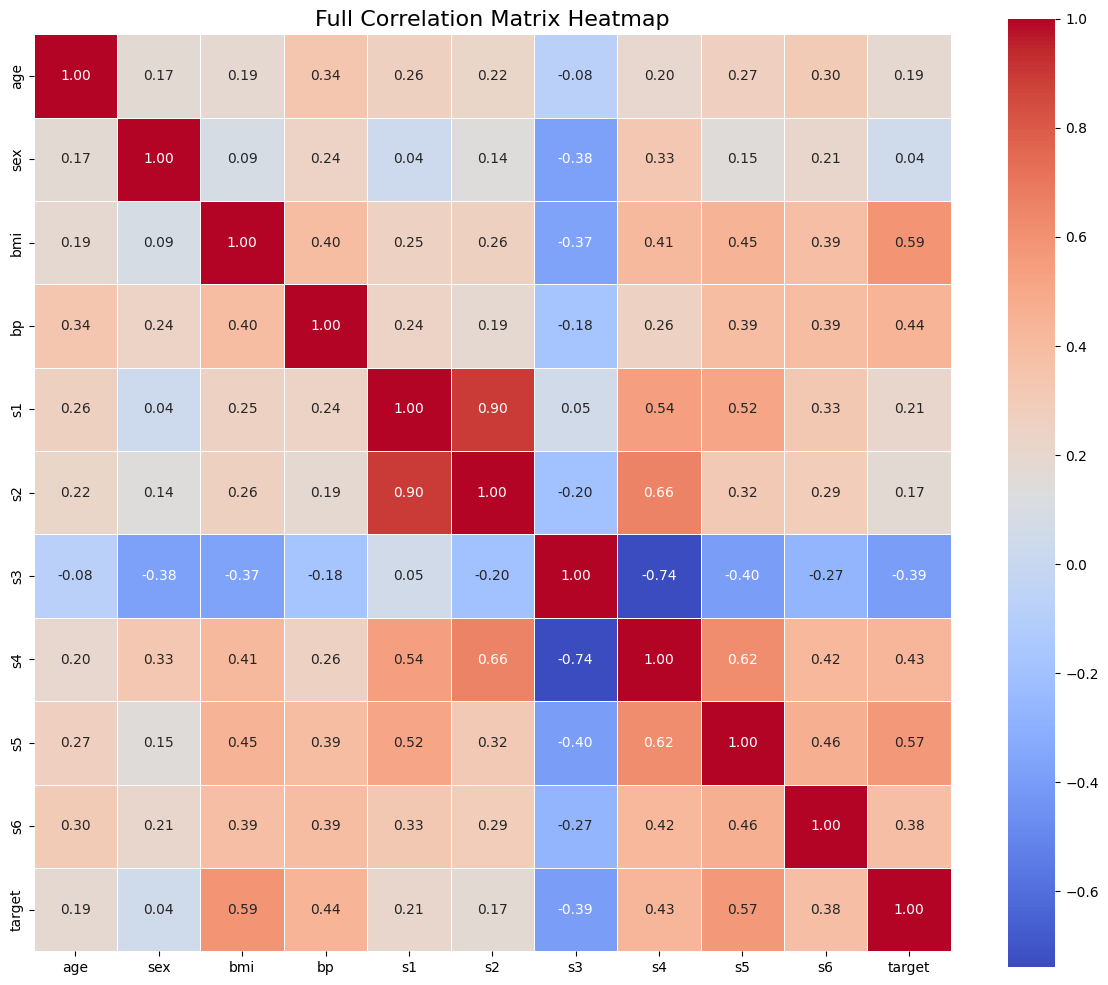

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(diabetes_data.corr(), annot=True, cmap="coolwarm", fmt=".2f", square=True, linewidths=0.5)
plt.title("Full Correlation Matrix Heatmap", fontsize=16)
plt.tight_layout()
plt.show()

**Step 3: Scatter Plot**

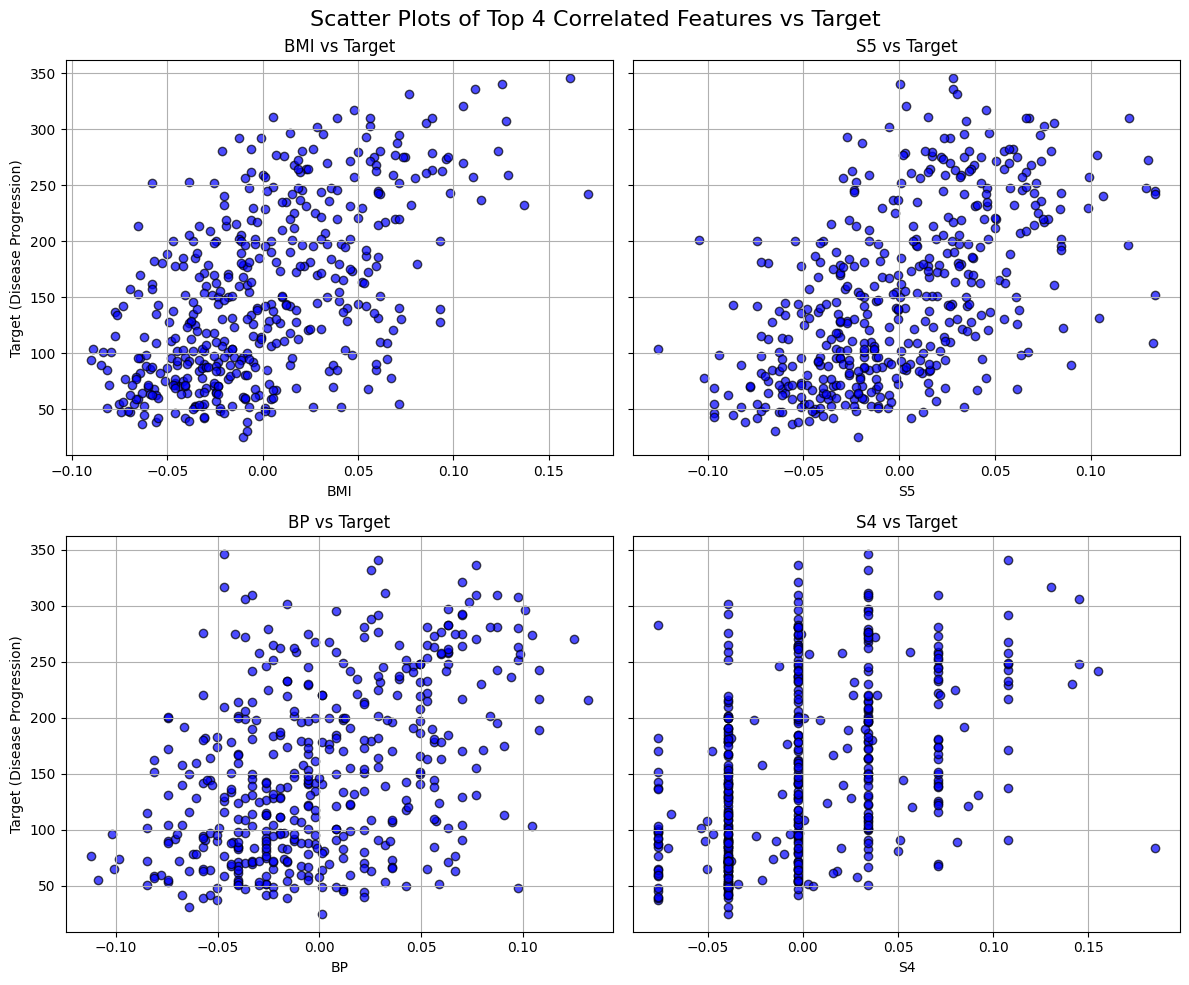

In [24]:
top_4_features = diabetes_data.corr()['target'].drop('target').abs().sort_values(ascending=False).head(4).index.tolist()

# Set up a 2x2 subplot layout for 4 scatter plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharey=True)

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each feature against the target using blue circles with black edges
for ax, feature in zip(axes, top_4_features):
    ax.scatter(diabetes_data[feature], diabetes_data['target'], marker='o', color='blue', edgecolors='black', alpha=0.7)
    ax.set_title(f"{feature.upper()} vs Target")
    ax.set_xlabel(feature.upper())
    ax.grid(True)

# Set the common y-axis label
axes[0].set_ylabel("Target (Disease Progression)")
axes[2].set_ylabel("Target (Disease Progression)")

# Overall title
fig.suptitle("Scatter Plots of Top 4 Correlated Features vs Target", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()



**Histogram**

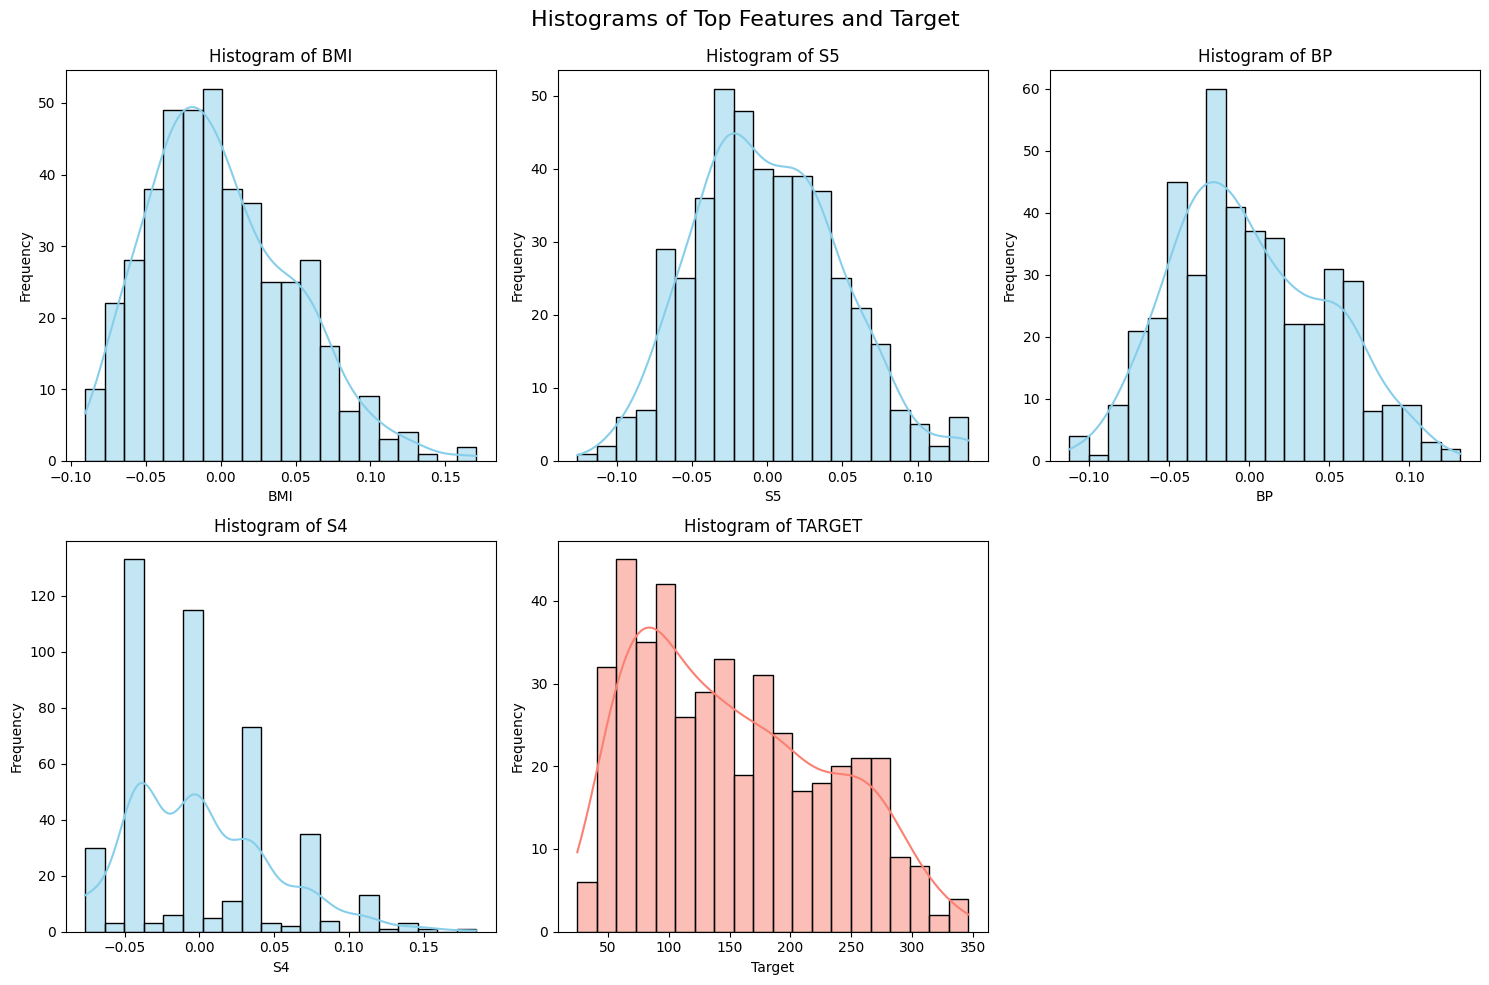

In [25]:
# Create histograms for the top 4 correlated features and the target
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Plot histograms for each of the top 4 features
for i, feature in enumerate(top_4_features):
    sns.histplot(diabetes_data[feature], bins=20, kde=True, color='skyblue', ax=axes[i])
    axes[i].set_title(f"Histogram of {feature.upper()}")
    axes[i].set_xlabel(feature.upper())
    axes[i].set_ylabel("Frequency")

# Plot histogram for the target
sns.histplot(diabetes_data['target'], bins=20, kde=True, color='salmon', ax=axes[4])
axes[4].set_title("Histogram of TARGET")
axes[4].set_xlabel("Target")
axes[4].set_ylabel("Frequency")

# Hide the unused subplot
axes[5].axis('off')

# Overall layout adjustments
fig.suptitle("Histograms of Top Features and Target", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()


**Scatter Plots**

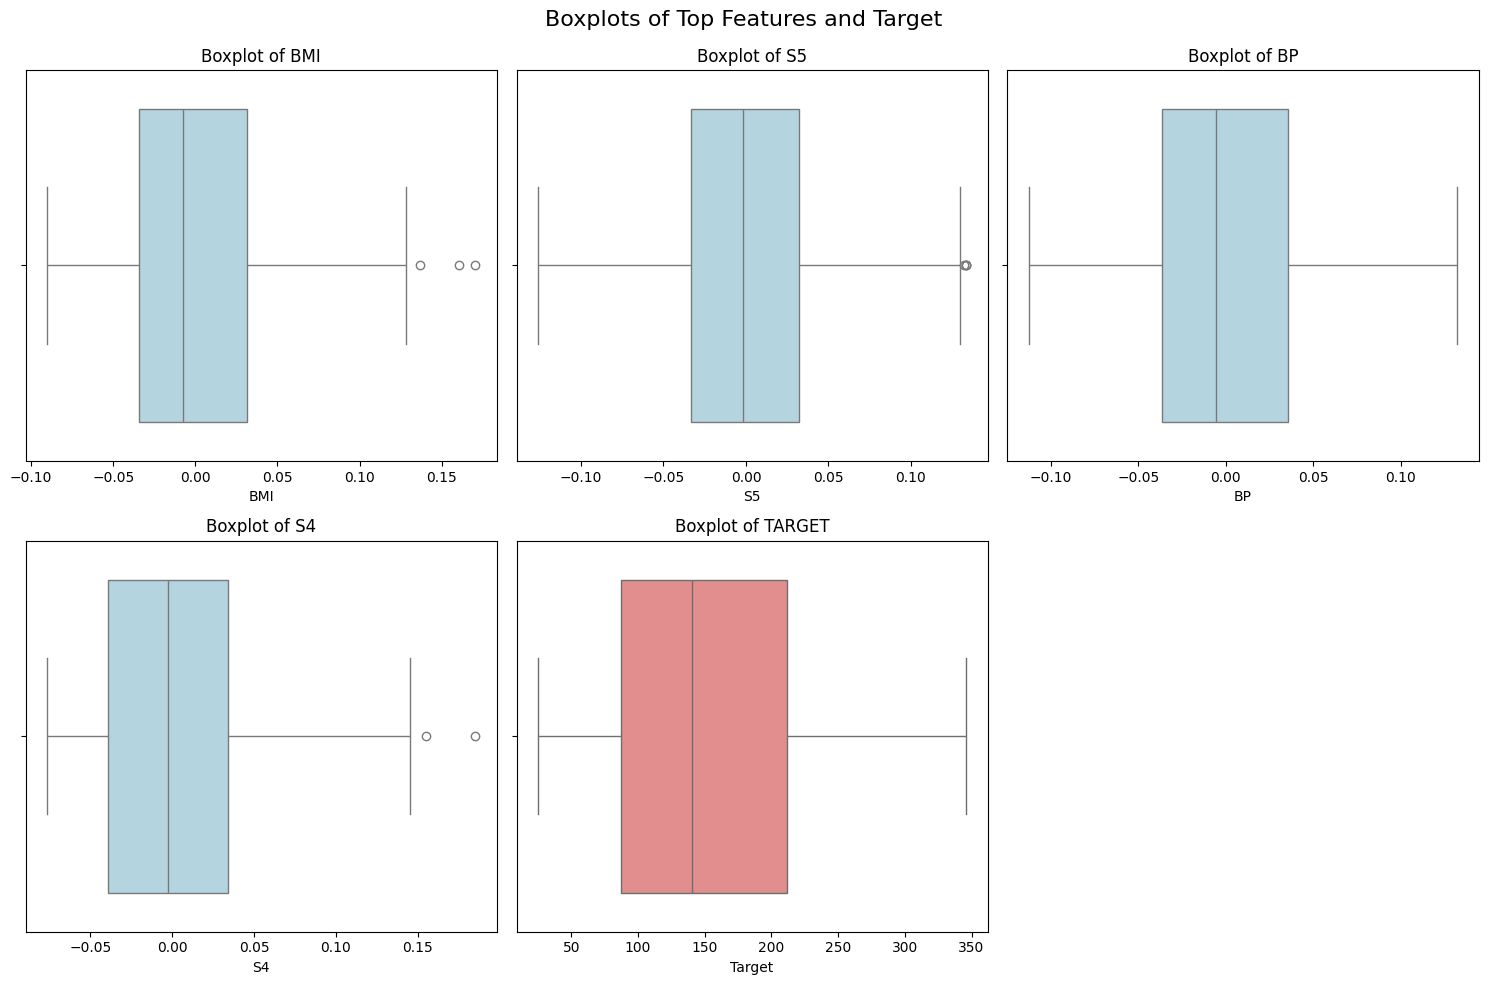

In [26]:
# Create boxplots for the top 4 features and the target
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Plot boxplots for each of the top 4 features
for i, feature in enumerate(top_4_features):
    sns.boxplot(x=diabetes_data[feature], color='lightblue', ax=axes[i])
    axes[i].set_title(f"Boxplot of {feature.upper()}")
    axes[i].set_xlabel(feature.upper())

# Plot boxplot for the target
sns.boxplot(x=diabetes_data['target'], color='lightcoral', ax=axes[4])
axes[4].set_title("Boxplot of TARGET")
axes[4].set_xlabel("Target")

# Hide unused subplot
axes[5].axis('off')

# Layout adjustments
fig.suptitle("Boxplots of Top Features and Target", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()
